In [385]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from skimage import feature, color
import pandas as pd
import numpy as np
import cv2
import os
import skimage
import skimage.io
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform


# Loading data function from the directory and Preprocessing the Images

In [386]:
def load_data(data_directory):
            directories = [d for d in os.listdir(data_directory) 
                           if os.path.isdir(os.path.join(data_directory, d)) and (d in {'00005', '00004', '00010', '00012', '00038'})]
            
            labels = []
            images = []
            
            for d in directories:
                label_directory = os.path.join(data_directory, d)
                
                file_names = [os.path.join(label_directory, f) 
                              for f in os.listdir(label_directory) 
                              if f.endswith(".ppm")]
                for f in file_names:
                    print(f)
                    img = skimage.io.imread(f)
                    img_resized=resize(img,(28,28,3))
                    gray_img=rgb2gray(img_resized)
                    images.append(gray_img.flatten())
                    labels.append(int(d))
            return images, labels

In [387]:
def load_data_single_directory(file_paths):
    images = []

    for f in file_paths:
        print(f)
        img = skimage.io.imread(f)
        img_resized = resize(img, (28, 28, 3))
        gray_img = rgb2gray(img_resized)
        images.append(gray_img.flatten())
        
    return images


In [388]:
#change the Following paths to fit your directory
ROOT_PATH = "C:/Users/user/Downloads/ML project/GTSRB"
train_data_directory = os.path.join(ROOT_PATH, "Final_Training","images")
test_data_directory = os.path.join(ROOT_PATH, "Final_Test","images")

In [389]:
#load the training images
images, labels = load_data(train_data_directory)

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00008_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00017_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00034_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00043_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00052_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00060_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00003_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00004_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00004_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00004_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00013_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00021_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00022_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00031_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00031_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00031_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00031_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00031_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00032_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00032_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00032_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00032_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00032_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00032_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00041_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00050_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00059_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00007_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00016_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00017_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00017_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00017_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00026_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00035_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00046_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00055_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00064_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00065_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00007_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00015_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00024_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00025_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00025_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00033_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00033_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00033_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00033_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00033_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00033_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00033_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00034_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00034_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00034_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00034_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00041_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00041_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00041_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00042_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00050_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00058_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00058_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00058_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00058_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00058_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00059_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00059_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00059_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00059_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00059_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00059_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00067_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00005_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00005_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00005_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00005_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00005_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00005_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00006_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00006_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00006_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00006_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00006_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00014_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00022_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00023_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00023_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00023_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00032_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00041_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00051_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00060_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00068_00029.ppm


In [390]:
#number of train Images that we have loaded
len(images)

10020

In [391]:
flat_images = np.array(images)

In [392]:
target = np.array(labels)

In [393]:
df = pd.DataFrame(flat_images) #dataframe
df['Target'] = target
x_train = df.iloc[:,:-1] #input data 
y_train = df.iloc[:,-1] #output data

In [394]:
file_path = "C:/Users/user/Downloads/ML project/GTSRB/GT-final_test.csv"
df2 = pd.read_csv(file_path, delimiter=';')
target_class_ids = [5, 4, 10, 12, 38]

# Directory where the test images are stored
test_data_directory = "C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images"

# Collect file paths of images with target_class_ids
filtered_file_paths = [
    os.path.join(test_data_directory, filename)
    for filename, class_id in zip(df2["Filename"], df2["ClassId"])
    if class_id in target_class_ids
]
test_labels = [
    class_id
    for class_id in df2["ClassId"]
    if class_id in target_class_ids
]


In [395]:
#load the test images
test_images = load_data_single_directory(filtered_file_paths)


C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00002.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00005.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00007.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00010.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00014.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00019.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00020.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00027.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00030.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00037.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00043.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00047.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00056.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00060.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00986.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00993.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00995.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\00997.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01002.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01003.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01004.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01005.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01006.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01008.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01009.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01011.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01013.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01014.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01891.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01893.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01899.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01900.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01901.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01905.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01908.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01913.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01915.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01922.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01924.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01933.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01938.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01939.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03020.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03024.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03026.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03028.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03032.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03033.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03036.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03044.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03047.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03053.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03054.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03061.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03064.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\03066.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04074.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04076.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04081.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04082.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04084.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04087.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04091.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04092.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04097.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04101.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04104.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04107.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04113.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04116.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05082.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05083.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05084.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05092.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05094.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05100.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05102.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05103.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05107.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05110.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05113.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05118.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05120.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05123.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05960.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05970.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05972.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05978.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05980.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05994.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05995.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\05998.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06012.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06014.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06015.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06018.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06019.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06021.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06975.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06976.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06978.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06983.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06984.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\06993.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07002.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07011.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07012.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07013.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07015.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07017.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07021.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07023.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07914.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07926.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07932.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07933.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07937.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07939.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07943.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07954.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07959.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07963.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07975.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07980.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07983.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07984.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08932.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08939.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08942.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08945.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08946.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08947.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08955.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08956.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08958.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08962.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08969.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08975.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08976.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\08981.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09893.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09900.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09902.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09904.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09919.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09921.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09924.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09930.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09932.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09934.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09939.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09944.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09946.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\09948.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10874.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10880.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10886.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10887.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10890.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10895.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10900.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10906.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10917.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10918.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10926.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10928.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10931.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10932.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12139.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12141.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12142.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12143.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12144.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12146.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12148.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12157.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12160.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12166.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12173.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12174.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12183.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\12197.ppm
C:/Users/user/Downloads/ML project

In [396]:
#number of test Images that we have loaded
len(test_images)

3330

In [397]:
flat_test_images = np.array(test_images)

In [398]:
test_target = np.array(test_labels)

In [399]:
df = pd.DataFrame(flat_test_images) #dataframe
df['Target'] = test_target
x_test = df.iloc[:,:-1] #input data 
y_test = df.iloc[:,-1] #output data

# Model Fitting to the data

In [400]:
from sklearn.linear_model import LogisticRegression

In [401]:
# initializing the model and train it
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [402]:
#from sklearn.utils import shuffle
#x_test = shuffle(x_test)
#generate predictions on the test images
y_predict = model.predict(x_test)

# model evaluation

In [403]:
#calculate the accuracy in BASE CASE
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.9447447447447448

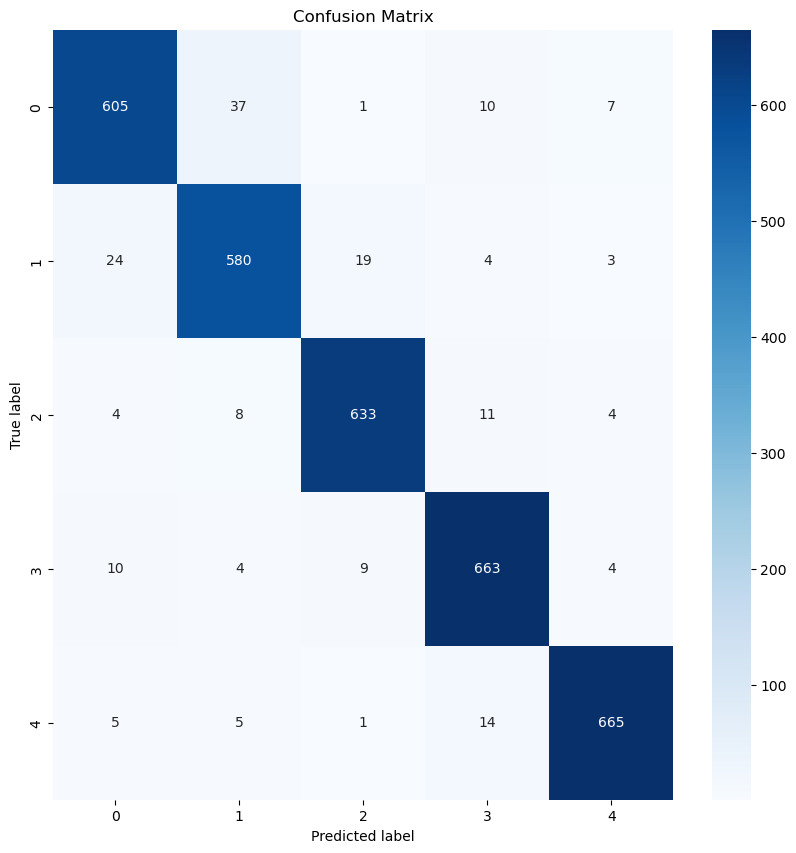

In [404]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# load images

In [405]:
def load_data(data_directory):
            directories = [d for d in os.listdir(data_directory) 
                           if os.path.isdir(os.path.join(data_directory, d)) and (d in {'00005', '00004', '00010', '00012', '00038'})]
            
            labels = []
            images = []
            
            for d in directories:
                label_directory = os.path.join(data_directory, d)
                
                file_names = [os.path.join(label_directory, f) 
                              for f in os.listdir(label_directory) 
                              if f.endswith(".ppm")]
                for f in file_names:
                    print(f)
                    img = skimage.io.imread(f)
                    images.append(img)
                    labels.append(int(d))
            return images, labels

In [406]:
def load_data_single_directory(file_names):
    # file_names = [os.path.join(data_directory, f) 
    #               for f in os.listdir(data_directory) 
    #               if f.endswith(".ppm")]
    images = []

    for f in file_names:
        print(f)
        img = skimage.io.imread(f)
        images.append(img)
        
    return images

In [407]:
images, labels = load_data(train_data_directory)
test_images = load_data_single_directory(filtered_file_paths)

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00000_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00025_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00004\00051_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00010_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00034_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00005\00060_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00022_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00047_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00047_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00047_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00010\00048_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00003_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00003_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00003_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00003_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00003_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00004_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00004_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00004_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00004_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00004_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00004_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00028_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00004.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00012\00054_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00005.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00006.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00007.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00008.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00009.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00010.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00011.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00012.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00013.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00014.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00009_00015.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00034_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00034_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00034_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00034_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00034_00027.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00034_00028.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00034_00029.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00035_00000.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00035_00001.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00035_00002.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00035_00003.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00016.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00017.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00018.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00019.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00020.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00021.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00022.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00023.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00024.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00025.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00038\00059_00026.ppm
C:/Users/user/Downloads/ML project/GTSRB\Final_Training\images\00

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01829.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01831.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01832.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01834.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01837.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01844.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01846.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01847.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01855.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01857.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01858.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01859.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01862.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\01870.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04708.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04710.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04712.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04722.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04723.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04728.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04733.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04741.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04744.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04745.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04746.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04747.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04758.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\04763.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07298.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07308.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07311.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07321.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07323.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07324.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07328.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07333.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07335.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07339.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07352.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07353.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07356.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\07361.ppm
C:/Users/user/Downloads/ML project

C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10055.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10057.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10071.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10073.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10080.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10081.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10084.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10097.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10099.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10103.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10104.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10111.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10115.ppm
C:/Users/user/Downloads/ML project/GTSRB/Final_Test/Images\10116.ppm
C:/Users/user/Downloads/ML project

# Preprocess the images to feed it to the HOG Algorithm

In [408]:
# define a function to preprocess Images for HOG
def preprocess_images_for_hog(images, size=(32, 32)):
    processed_images = []
    for img in images:
        # Resize the image
        resized_img = resize(img,size)

        # Change to grayscale if it has three channels.
        if resized_img.shape[-1] == 3:
           grayscale_img = rgb2gray(resized_img)
        else:
           grayscale_img = resized_img

        processed_images.append(resized_img)
    return np.array(processed_images)

In [409]:
# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(images)
test_images_processed = preprocess_images_for_hog(test_images)

# Apply the HOG feature extraction Algorithm to the data

In [410]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [411]:
# Compute HOG features for Training images
train_hog_features = []
for img in train_images_processed:
    # Convert the image to grayscale
    gray_img = color.rgb2gray(img)

    # Compute HOG features for the entire grayscale image
    hog_img = feature.hog(gray_img, visualize=False)

    train_hog_features.append(hog_img)

# Load the model and train

In [412]:
# Train logistic regression model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(train_hog_features, labels)

LogisticRegression(solver='liblinear')

In [413]:
# Compute HOG features for test images
test_hog_features = []
for img in test_images_processed:
    # Resize the image
    resized_img = resize(img, (32, 32))

    # Convert to grayscale if it has three channels
    if resized_img.shape[-1] == 3:
        grayscale_img = color.rgb2gray(resized_img)
    else:
        grayscale_img = resized_img

    # Compute HOG features
    hog_img = feature.hog(grayscale_img, visualize=False)
    test_hog_features.append(hog_img)

# Generate Predictions and Evaluate the Model

In [414]:
# Predict on test set 
predictions = logreg.predict(test_hog_features)
# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy of logistic regression with HOG features: {accuracy}")

Accuracy of logistic regression with HOG features: 0.9693693693693693


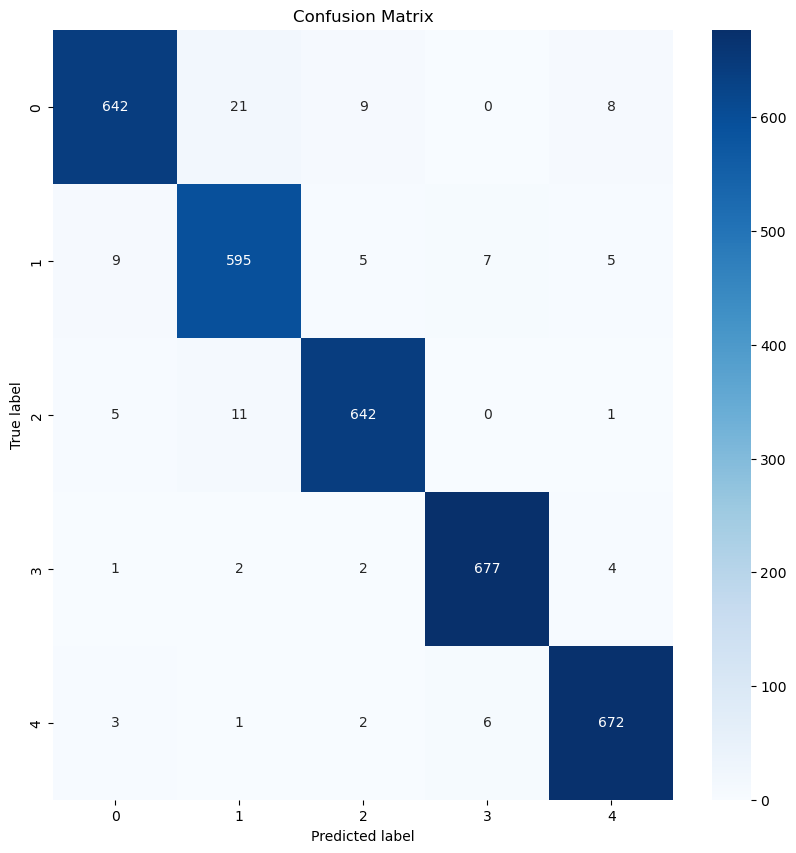

In [415]:
# Generate confusion matrix
conf_matrix = confusion_matrix(predictions, test_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

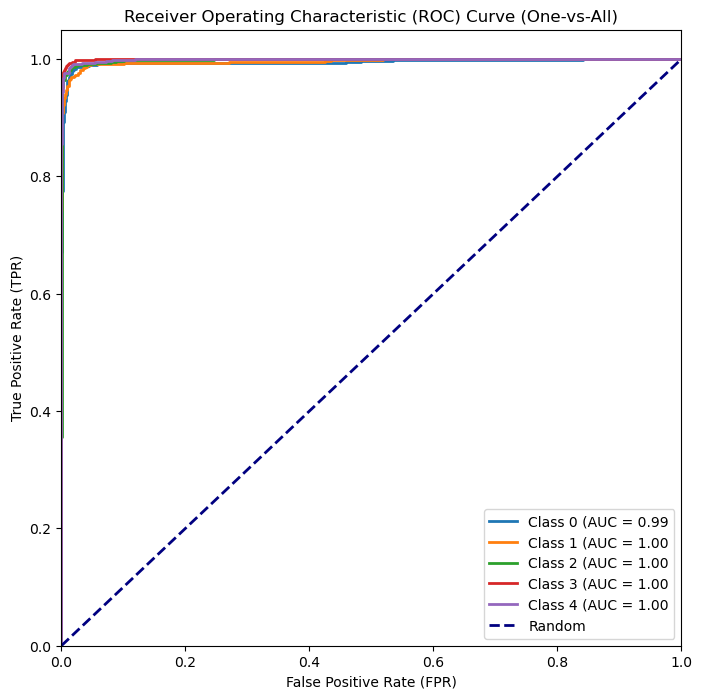

In [416]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model (logreg)
# and test data (test_hog_features, test_labels)

# Binarize the labels for the one-vs-all approach
test_labels_bin = label_binarize(test_labels, classes=np.unique(test_labels))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(test_labels_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], logreg.predict_proba(test_hog_features)[:, i])
    roc_auc[i] = roc_auc_score(test_labels_bin[:, i], logreg.predict_proba(test_hog_features)[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(test_labels_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-All)')
plt.legend(loc='lower right')
plt.show()


# Kmean

X-train
y-train
x-test
y-test
images,labels
train_hog_features
test_hog_features

In [417]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score

In [418]:
num_clusters = len(np.unique(test_labels))
num_clusters

5

In [419]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(train_hog_features)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [420]:
cluster_labels = {}
for i in range(num_clusters):
    cluster_mask = (kmeans.labels_ == i)
    cluster_true_labels = y_train[cluster_mask]
    most_common_label = np.bincount(cluster_true_labels).argmax()
    cluster_labels[i] = most_common_label

In [421]:
predicted_labels = []
for i in range(len(test_hog_features)):
    # Extract features for the test image
    test_image = test_hog_features[i].reshape(1, -1)

    # Use the trained K-means model to assign it to the closest cluster
    cluster_assignment = kmeans.predict(test_image)

    # Assign the label from the majority class in that cluster
    predicted_label = cluster_labels[cluster_assignment[0]]
    predicted_labels.append(predicted_label)

In [422]:
accuracy = metrics.accuracy_score(y_test, predicted_labels)
f1_score = metrics.f1_score(y_test, predicted_labels, average='weighted')

In [423]:
print(f"Accuracy of kmean with HOG features: {accuracy}")
print(f"f1_score of kmean with HOG features: {f1_score}")

Accuracy of kmean with HOG features: 0.7156156156156156
f1_score of kmean with HOG features: 0.6665653365603794
